In [116]:
import pandas as pd
import numpy as np
import missingno as msno
import utils as tools

In [117]:
df = pd.read_csv("../data/AmesHousing.csv")

Ajout de NaN numpy pour les traiter plus facilement par la suite

In [118]:
df.fillna(np.nan, inplace=True)

### Séparation des données en 2 DataFrame (Cat et Num)

In [119]:
# Numériques
numeric_df = df.select_dtypes(include='number')

# Catégoriques
categorical_df = df.select_dtypes(include='object')

### Gestion des manquants / Feature Selection

#### Variables numériques

<Axes: >

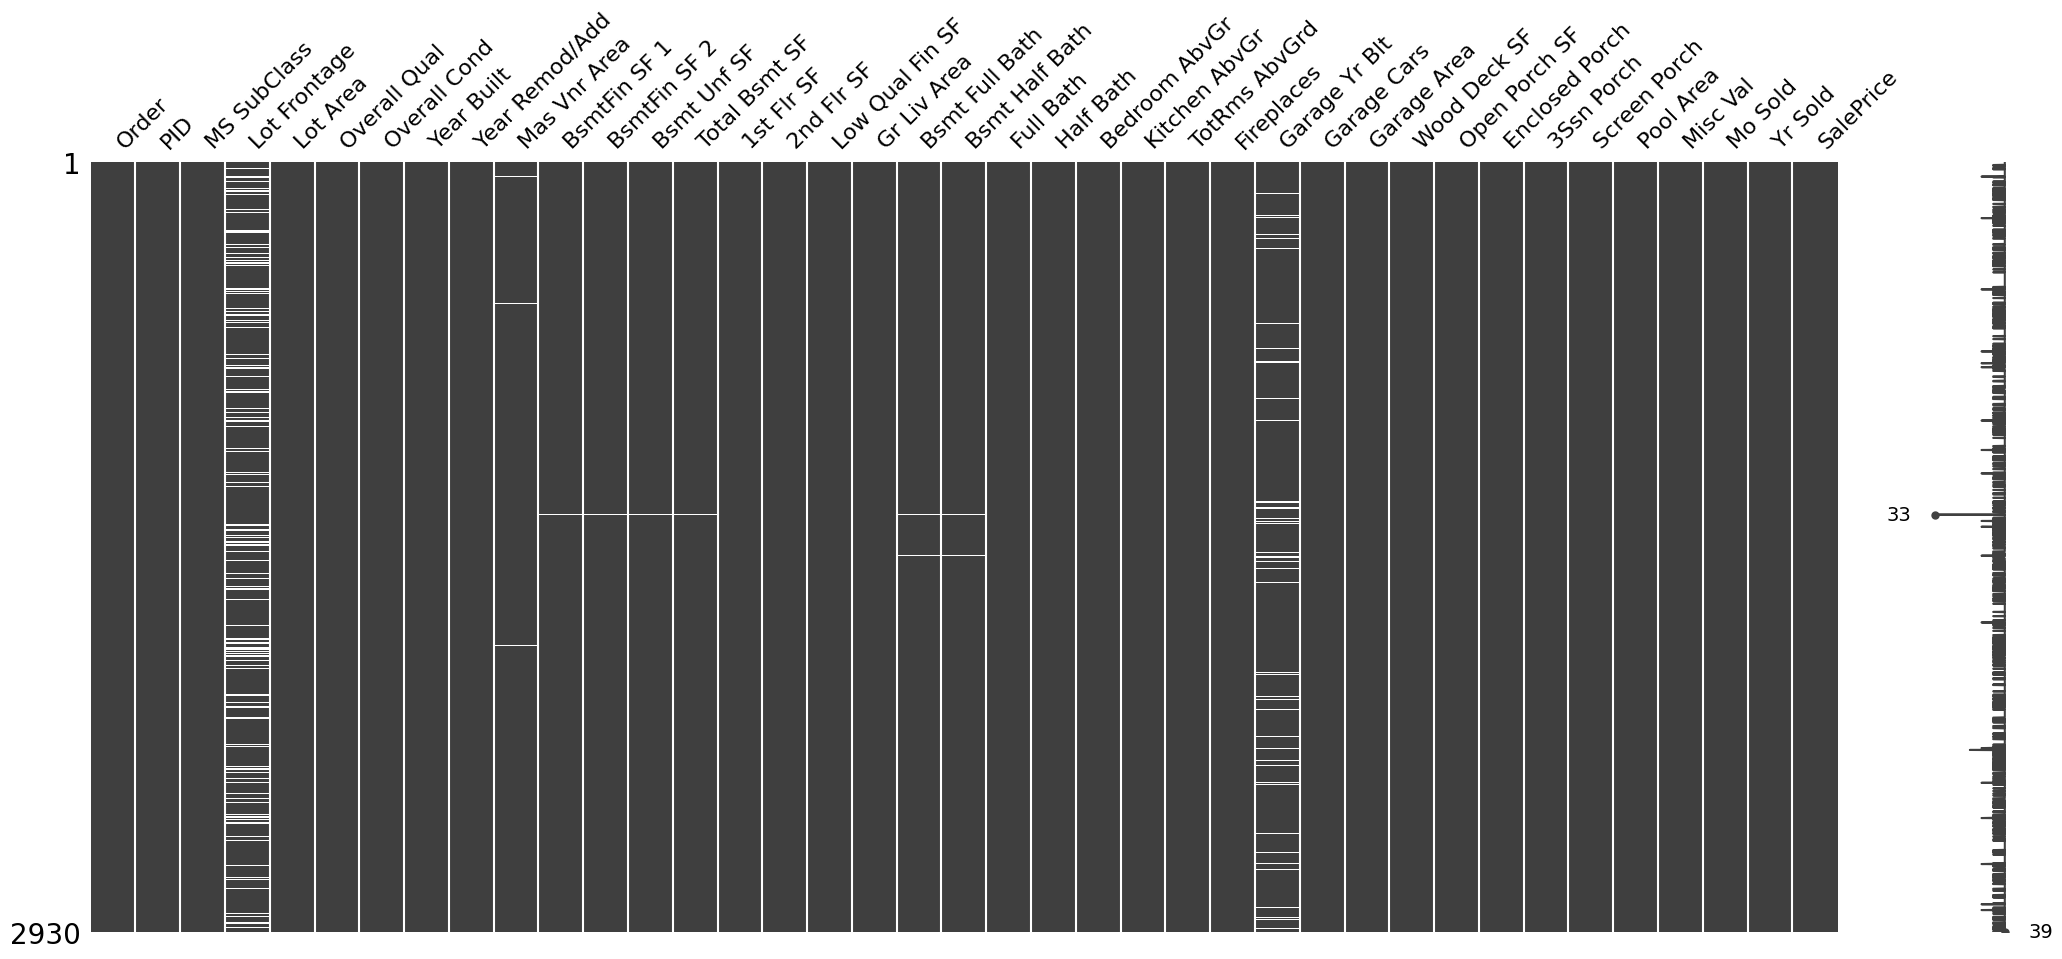

In [120]:
msno.matrix(numeric_df)

##### Création de varibles explicatives (Concat)
- renov : O/N si le bien a été renové depuis sa construction

In [121]:
numeric_df["renov"] = numeric_df.apply(lambda x: 0 if x['Year Built'] == x['Year Remod/Add'] else 1, axis=1)

#### Variables catégorielles

<Axes: >

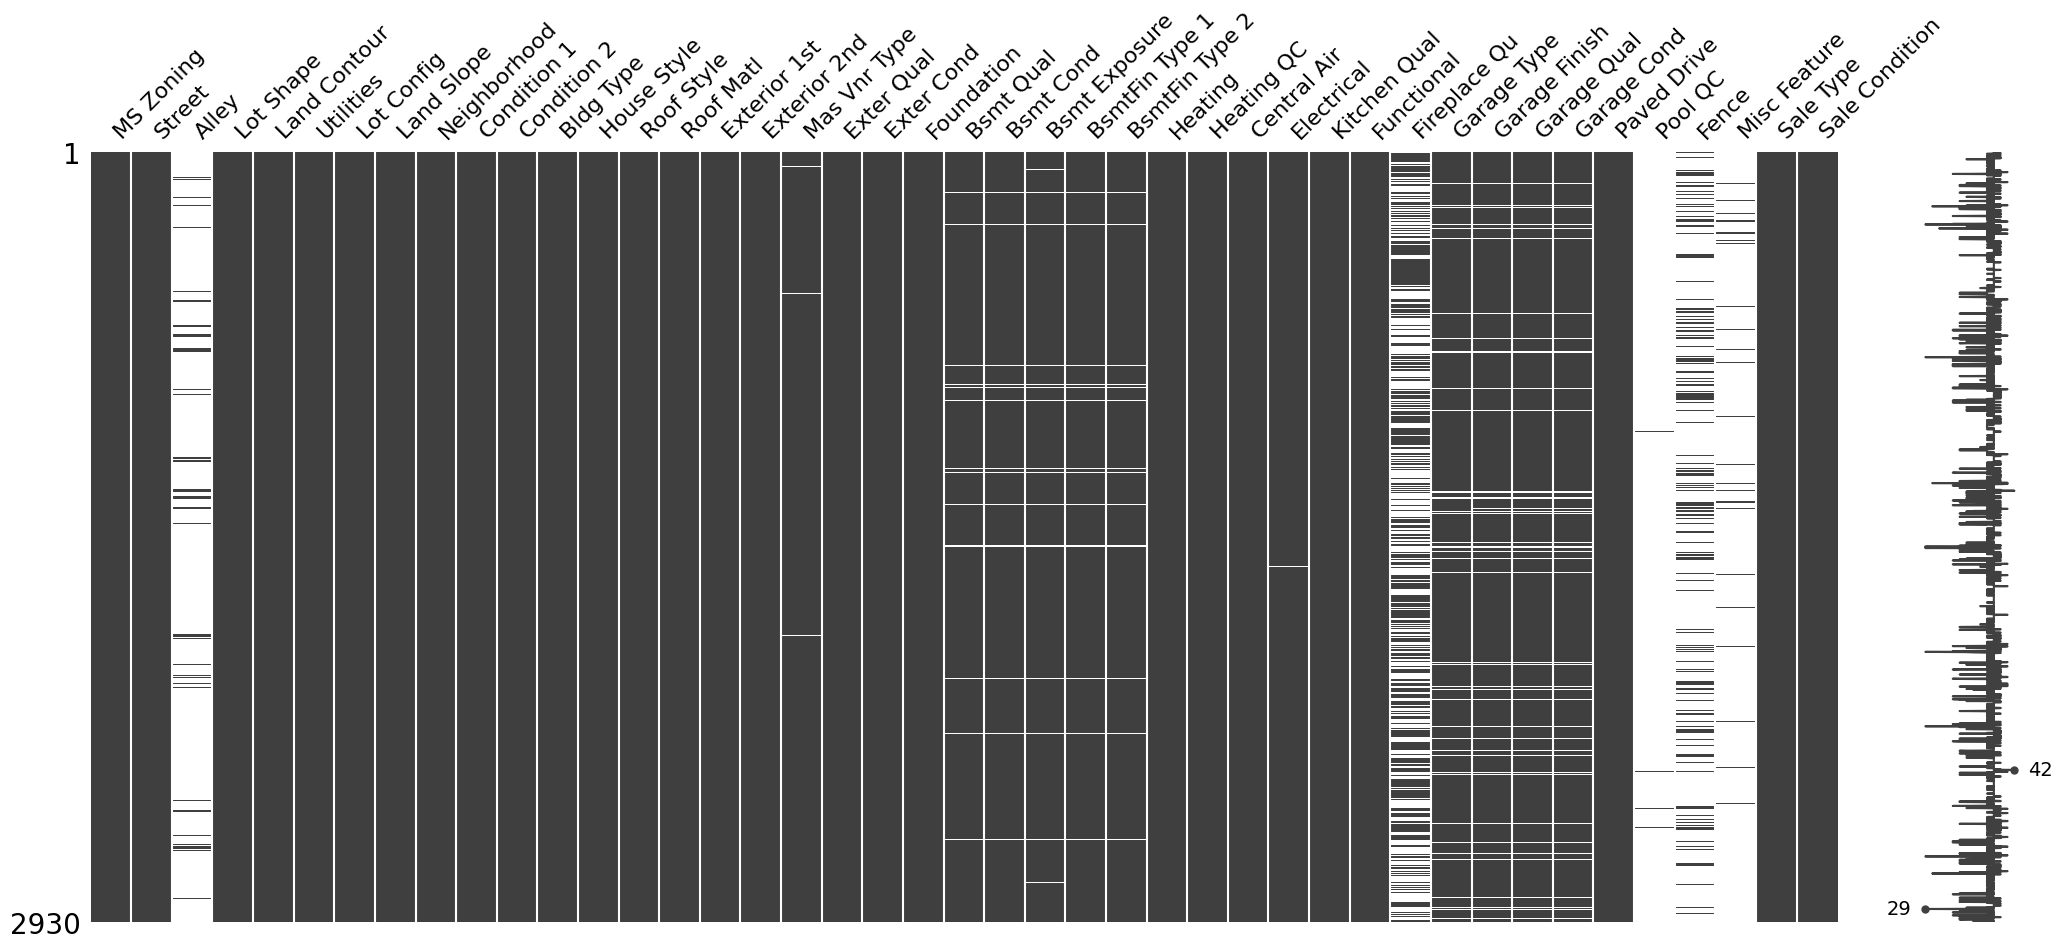

In [122]:
msno.matrix(categorical_df)

- On isole les variables qui ont plus de 40% de manquants
- On les supprime car on part du principe que le modèle n'aura pas assez d'observations pour s'entrainer efficacement

In [123]:
categorical_df= categorical_df.drop(columns=tools.filter_columns_with_missing(categorical_df, 40).columns, index=1)

<Axes: >

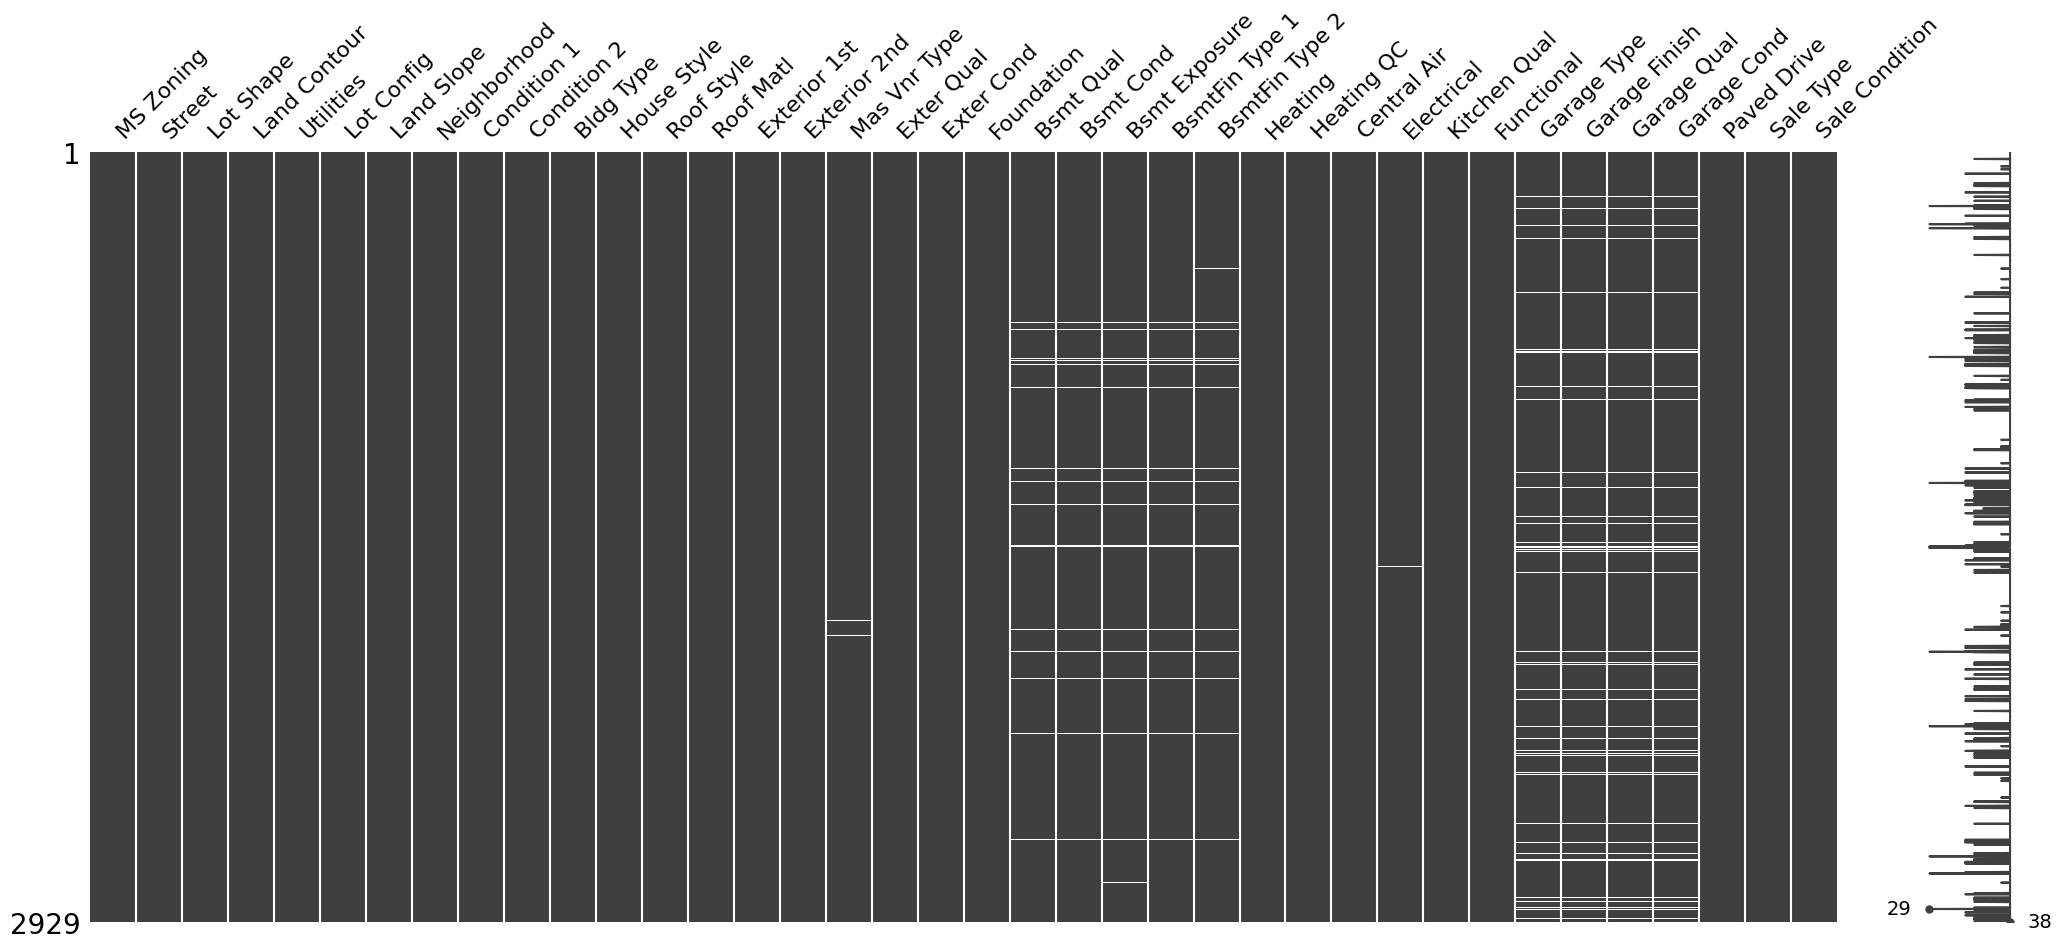

In [124]:
msno.matrix(categorical_df)

##### Ajout de variables explicatives (Concat)

- cave : Si "BsmtQual" est NaN alors on considère qu'il n'y a pas de sous sol (O/N)

In [125]:
categorical_df["cave"] = categorical_df["Bsmt Qual"].apply(lambda x: 1 if str(x) != "nan" else 0)

On peut supprimer les variables en rapport avec "Cave"

In [131]:
categorical_df.drop(columns=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'], inplace=True, axis=1)

- garage : Si "Garage Type" est a NaN alors on considère qu'il n'y a pas de garage (O/N)

In [133]:
categorical_df["garage"] = categorical_df["Garage Type"].apply(lambda x: 1 if str(x) != "nan" else 0)

On supprime également les variables en rapport avec "garage"

In [137]:
categorical_df.drop(columns=['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond'], inplace=True, axis=1)

- condition : Condition 1 , on supprime condition 2

In [143]:
categorical_df['condition'] = categorical_df["Condition 1"]
categorical_df.drop(columns=["Condition 2", "Condition 1"], inplace=True, axis=1)

##### Suppression des manquants restants

In [ ]:
categorical_df.dropna(inplace=True)

<Axes: >

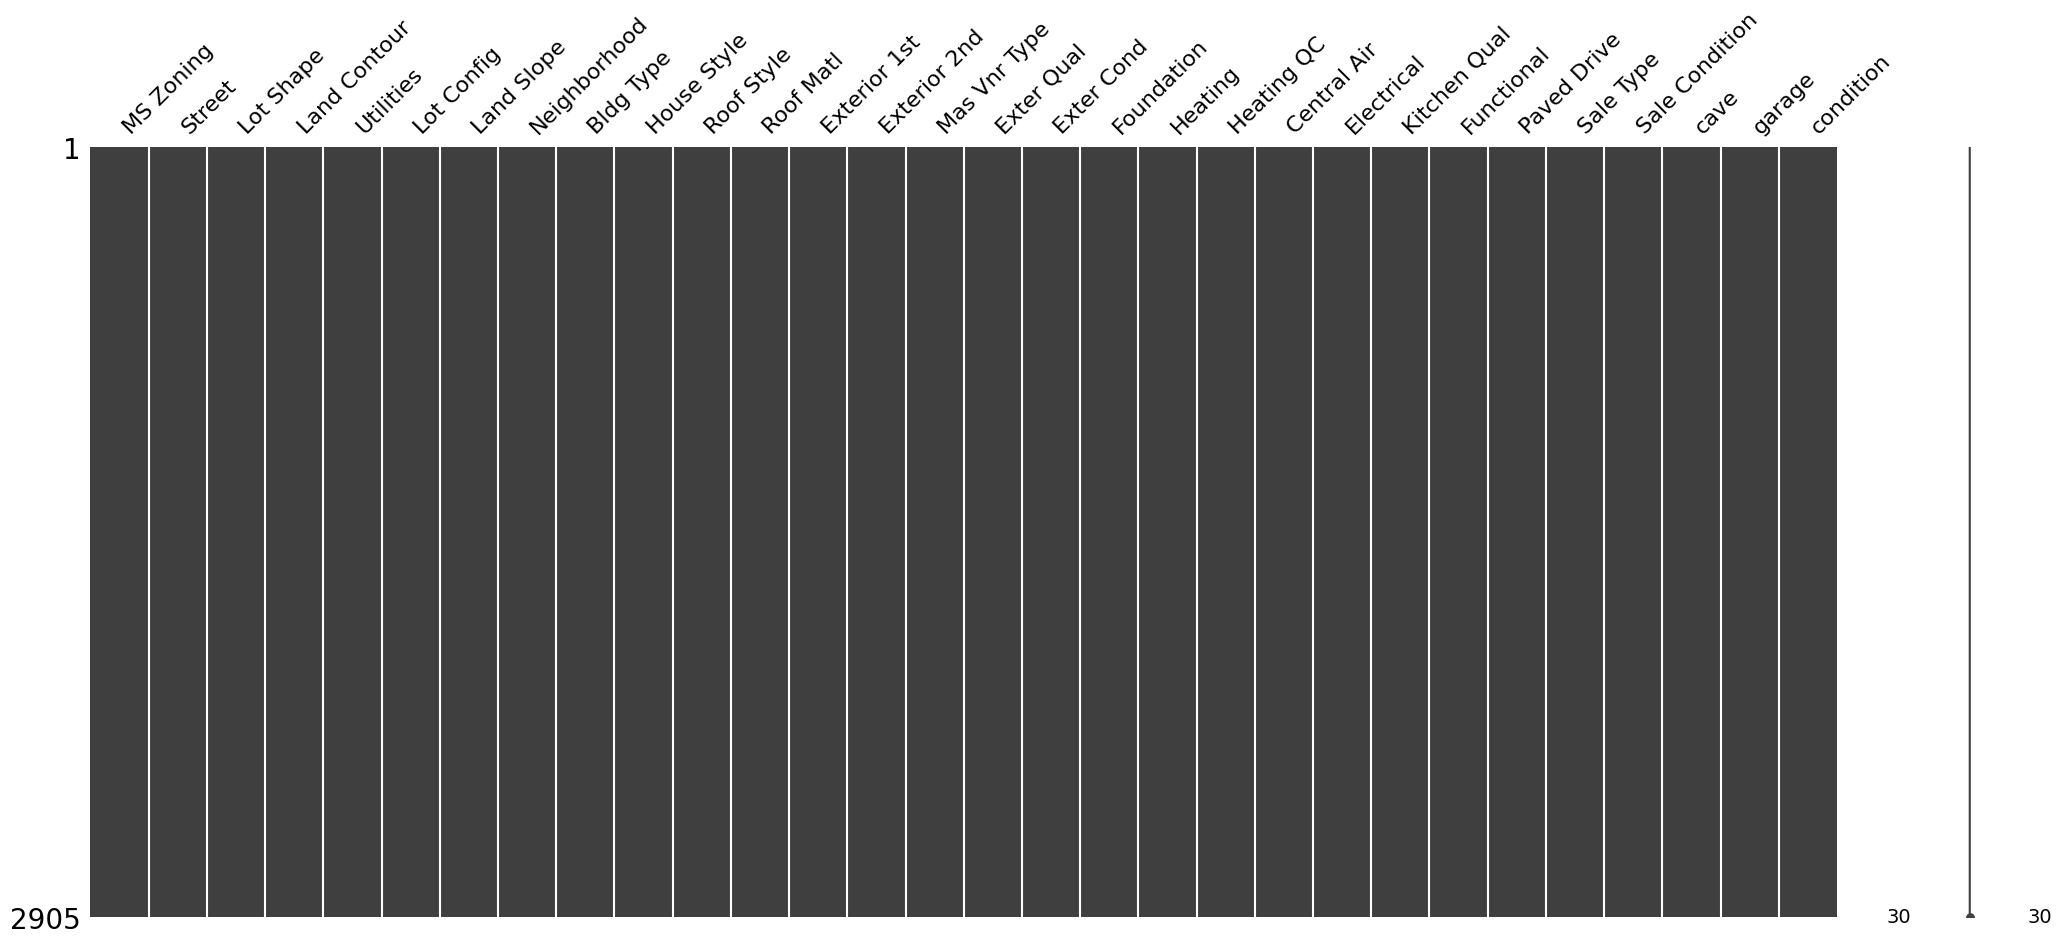

In [144]:
msno.matrix(categorical_df)

#### Suppression des variables inutiles
- Order : Non exploitable
- PID : Non exploitable
- MS SubClass : Trop complexe pour le demander à l'user